In [1]:
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image, ImageFilter, ImageEnhance, ImageColor, ImageOps

In [2]:
ITEM_SIZE = (20, 20)

## Player

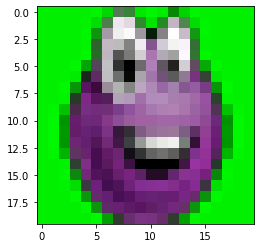

In [3]:
im_player = Image.open("Lazarus_stand.gif").convert("RGB")
#im_player = im_player.convert('P', palette=Image.ADAPTIVE, colors=6)
im_player = ImageOps.posterize(im_player, 4)
im_player = im_player.crop((0,2,38,40))
im_player = im_player.resize(ITEM_SIZE)
plt.imshow(im_player)

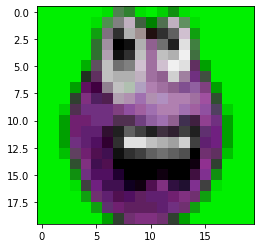

In [4]:
im_player_sq = Image.open("Lazarus_squished.gif").convert("RGB")
#im_player_sq = im_player_sq.convert('P', palette=Image.ADAPTIVE, colors=6)
im_player_sq = im_player_sq.crop((0,2,38,40))
im_player_sq = im_player_sq.resize(ITEM_SIZE)
im_player_sq = ImageOps.posterize(im_player_sq, 4)

plt.imshow(im_player_sq)

## Wall

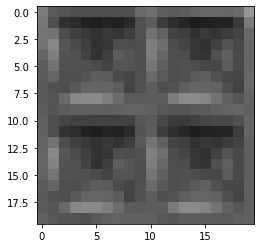

In [5]:
im_wall = Image.open("Wall.gif").convert("RGB")
#im_wall = im_wall.convert('P', palette=Image.ADAPTIVE, colors=6)
im_wall = ImageOps.posterize(im_wall, 4)
im_wall = im_wall.crop((1,1,39,39))
im_wall = im_wall.resize(ITEM_SIZE)

plt.imshow(im_wall)

## Boxes

In [6]:
def get_box(file_name: str):
    im = Image.open(file_name).convert("RGB")
    #im = im.convert('P', palette=Image.ADAPTIVE, colors=6)
    im = ImageOps.posterize(im, 4)
    im = im.crop((1,1,39,39))
    im = im.resize(ITEM_SIZE)
        
    return im

def set_color_to_green(im, color: str):
    new_image = []
    for p in im.getdata():
        if p == (0, 0, 0):
            new_image.append((0, 255, 0))
        else:
            new_image.append(p)
    im.putdata(new_image)

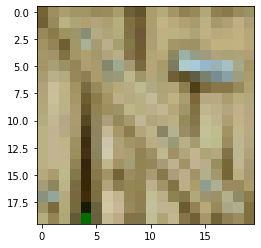

In [7]:
im_wood = get_box("WoodBox.gif")
plt.imshow(im_wood)

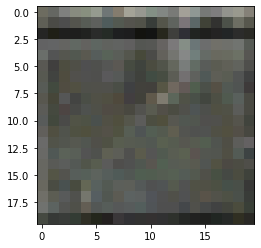

In [8]:
im_stone = get_box("StoneBox.gif")
plt.imshow(im_stone)

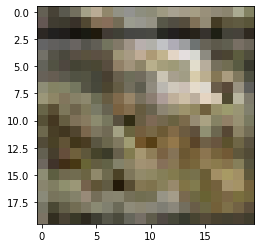

In [9]:
im_rock = get_box("Rock.gif")
plt.imshow(im_rock)

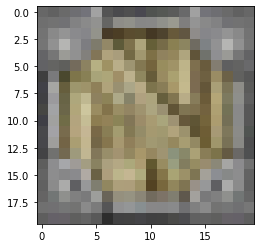

In [10]:
im_metal = get_box("MetalBox.gif")
set_color_to_green(im_metal, "#000")
plt.imshow(im_metal)

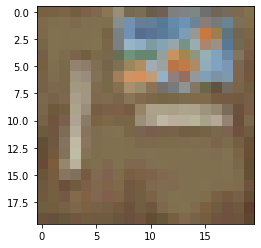

In [11]:
im_card = get_box("CardBox.gif")
plt.imshow(im_card)

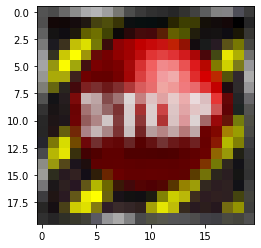

In [12]:
im_btn = get_box("Button.gif")
plt.imshow(im_btn)

## Combine palette

In [21]:
def tohex(color_tuple):
    return (color_tuple[0]<<16) + (color_tuple[1]<<8) + (color_tuple[2])

def combine_palette(palette: np.array, im):
    im = im.convert("RGB")
    result = np.zeros(20*20, dtype="uint8")
    for y in range(20):
        for x in range(20):
            color = tohex(im.getpixel((x,y)))
            found = np.where(palette == color)[0]
            if len(found) != 0:
                result[y*20 + x] = found[0]
            else:
                palette = np.append(palette, color)
                result[y*20 + x] = len(palette)-1

    return result, palette

In [22]:
imgs = [im_player, im_player_sq, im_wall, im_wood, im_stone, im_rock, im_metal, im_card, im_btn]

palette = np.array([], dtype=np.int32)
img_result = []
for im in imgs:
    img, palette = combine_palette(palette, im)
    img_result.append(img)
palette

array([  61440,   62976,   55040, ..., 4144964, 4868673, 4539709])

## Write to files

In [23]:
import struct
 
def write_rest(file_name, img):
    payload = img.tobytes()
    with open(file_name, "w+b") as f:
        f.write(payload)

In [24]:
# palette
with open("palette.b", "w+b") as f:
    for color in palette:
        payload = struct.pack("I", color)
        f.write(payload)

In [25]:
names = ["player.b", "player_sq.b", "wall.b", "wood.b", "stone.b", "rock.b", "metal.b", "card.b", "btn.b"]

for name, img in zip(names, img_result):
    write_rest(name, img)

In [27]:
img_result[4], img_result[0]

(array([ 57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,
         70,  71,  72,  73,  74,  75,  76,  77,  78, 118,  79,  80,  81,
         82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,
         95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107,
        108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120,
        121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133,
        134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146,
        147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159,
        160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172,
        173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185,
        186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198,
        199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211,
        212, 213, 214, 215, 216, 217, 218, 219, 203, 220, 221, 222, 223,
        224, 225, 226, 227, 228, 229, 230, 231, 232

In [19]:
len(palette)/255

10.325490196078432